In [2]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
tk = th.Thicket.from_caliperreader(glob("../cali_files/sample/**/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:01<00:00, 132.73it/s]
/home/alex/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4074542,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a16777216-ssample-irandom.cali,true,true,true,true,1729586333,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, random]",c,sample,mpi,int,4,16777216,random,256,8,online,strong
30287862,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a16777216-ssample-ireverse.cali,true,true,true,true,1729584860,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, reverse]",c,sample,mpi,int,4,16777216,reverse,32,8,online,strong
48721836,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a4194304-ssample-ireverse.cali,true,true,true,true,1729584729,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, sample, reverse]",c,sample,mpi,int,4,4194304,reverse,64,8,online,strong
73276465,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a67108864-ssample-ireverse.cali,true,true,true,true,1729586768,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, sample, reverse]",c,sample,mpi,int,4,67108864,reverse,512,8,online,strong
83238932,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-ssample-ireverse.cali,true,true,true,true,1729586045,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,128,8,online,strong
94794268,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a1048576-ssample-ireverse.cali,true,true,true,true,1729584615,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, sample, reverse]",c,sample,mpi,int,4,1048576,reverse,16,8,online,strong
110512547,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-ssample-ireverse.cali,true,true,true,true,1729584612,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, sample, reverse]",c,sample,mpi,int,4,1048576,reverse,32,8,online,strong
113737997,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a4194304-ssample-irandom.cali,true,true,true,true,1729584790,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, sample, random]",c,sample,mpi,int,4,4194304,random,32,8,online,strong
123551920,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a65536-ssample-i1perturbed.cali,true,true,true,true,1729585965,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 65536, sample, 1perturbed]",c,sample,mpi,int,4,65536,1perturbed,128,8,online,strong


In [5]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

2.480 main
├─ 0.473 MPI_Comm_dup
├─ 0.048 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.082 comm
│  ├─ 0.044 comm_large
│  │  ├─ 0.005 MPI_Alltoall
│  │  ├─ 0.005 MPI_Alltoallv
│  │  ├─ 0.001 MPI_Gather
│  │  ├─ 0.029 MPI_Gatherv
│  │  └─ 0.005 MPI_Scatter
│  └─ 0.038 comm_small
│     └─ 0.038 MPI_Bcast
├─ 0.060 comp
│  ├─ 0.059 comp_large
│  └─ 0.001 comp_small
├─ 0.002 correctness_check
└─ 0.073 data_init_runtime
   └─ 0.070 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 2.48 indices: {'profile': 4074542})
█ 2.23 - 2.48
█ 1.74 - 2.23
█ 1.24 - 1.74
█ 0.74 - 1.24
█ 0.25 - 0.74
█ 0.00 - 0.25

name User code    ◀  Only in left graph    ▶  Only in right graph



In [6]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",4074542,1.0,regionprofile,2.471747,2.487463,2.479850,634.841710,0.000015,1.694945,1.773140,1.743048,446.220217,NaN,NaN,NaN,NaN,main,256,random,16777216
1,"{'name': 'main', 'type': 'function'}",30287862,1.0,regionprofile,2.433209,2.440840,2.437341,77.994916,0.000008,1.494449,1.503860,1.499807,47.993839,NaN,NaN,NaN,NaN,main,32,reverse,16777216
2,"{'name': 'main', 'type': 'function'}",48721836,1.0,regionprofile,1.767201,1.777018,1.772100,113.414400,0.000008,1.561991,1.583421,1.570252,100.496098,NaN,NaN,NaN,NaN,main,64,reverse,4194304
3,"{'name': 'main', 'type': 'function'}",73276465,1.0,regionprofile,5.105792,5.612884,5.571358,2852.535385,0.001491,2.000105,2.477034,2.089634,1069.892811,NaN,NaN,NaN,NaN,main,512,reverse,67108864
4,"{'name': 'main', 'type': 'function'}",83238932,1.0,regionprofile,11.751528,11.771779,11.758841,1505.131601,0.000019,1.591680,1.634214,1.612970,206.460188,NaN,NaN,NaN,NaN,main,128,reverse,268435456


In [7]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

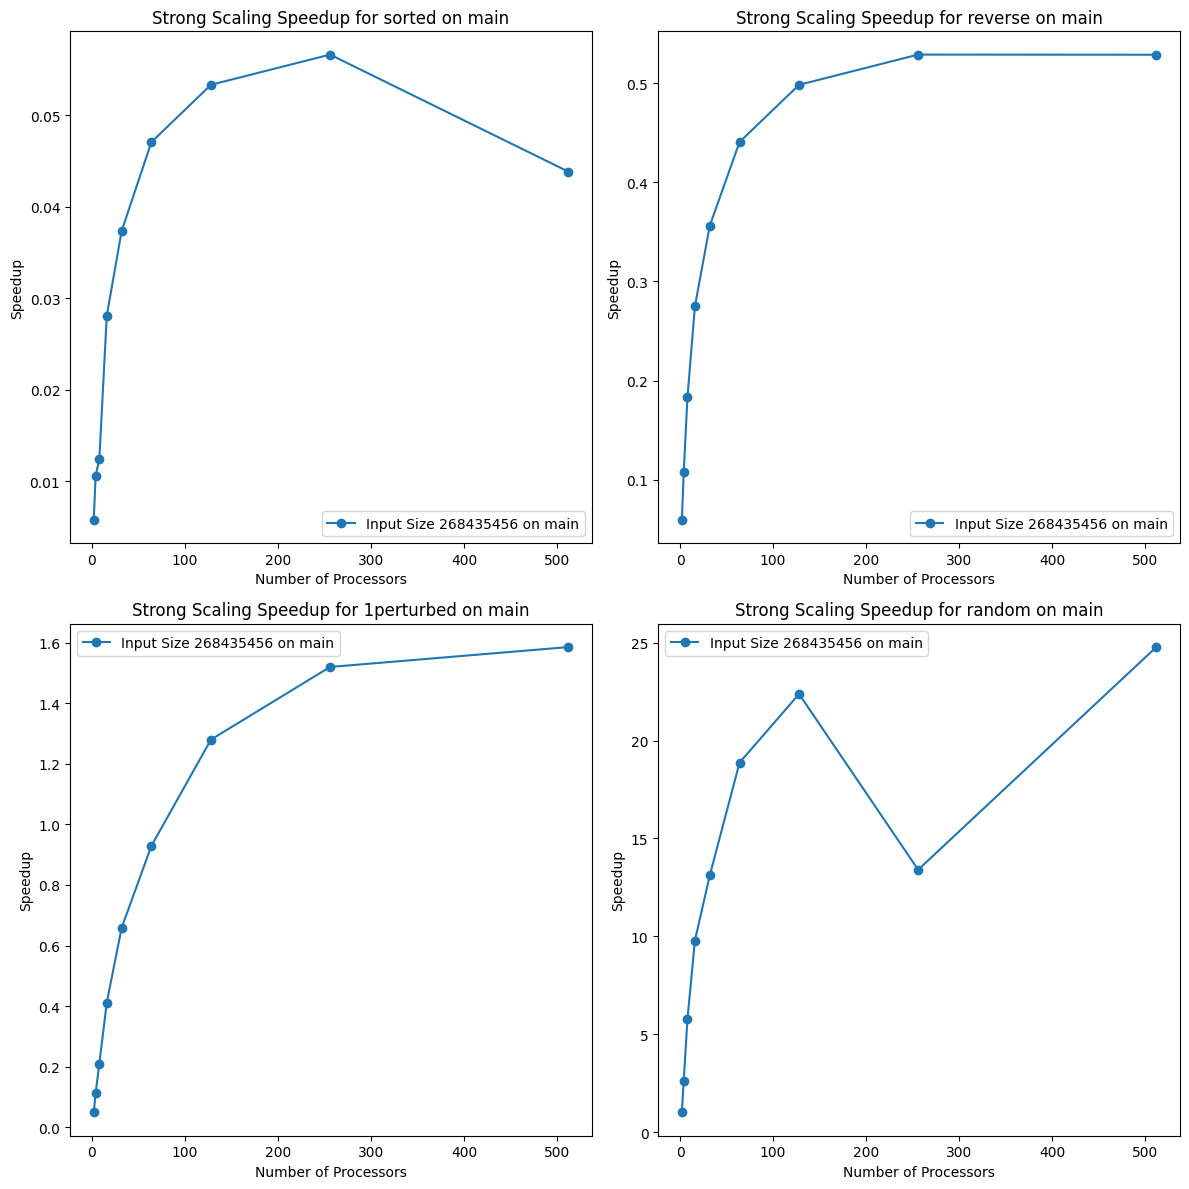

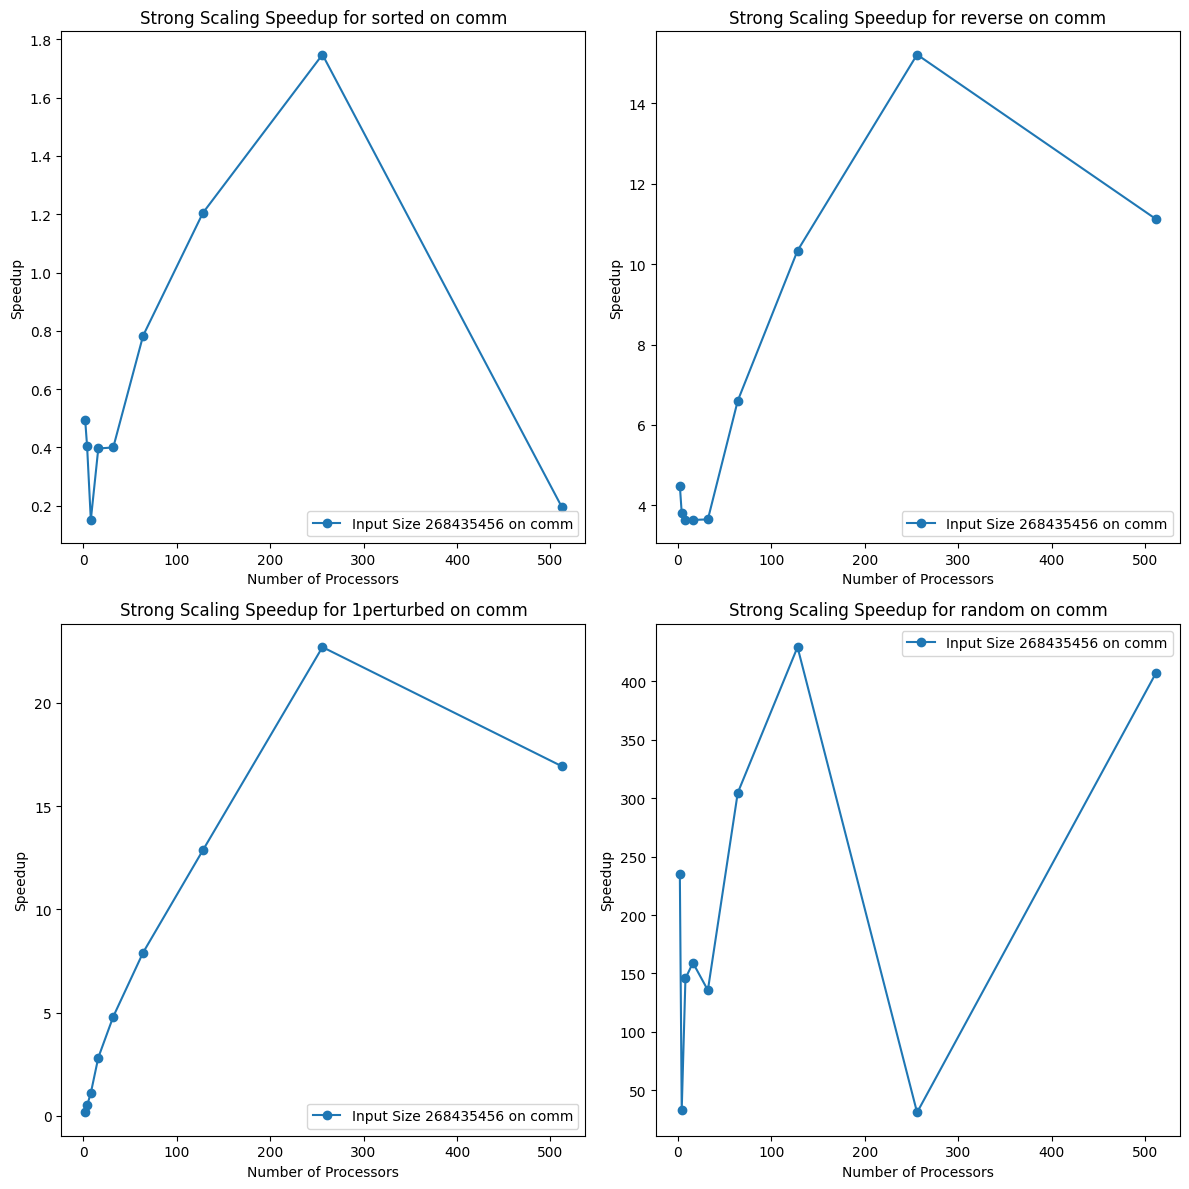

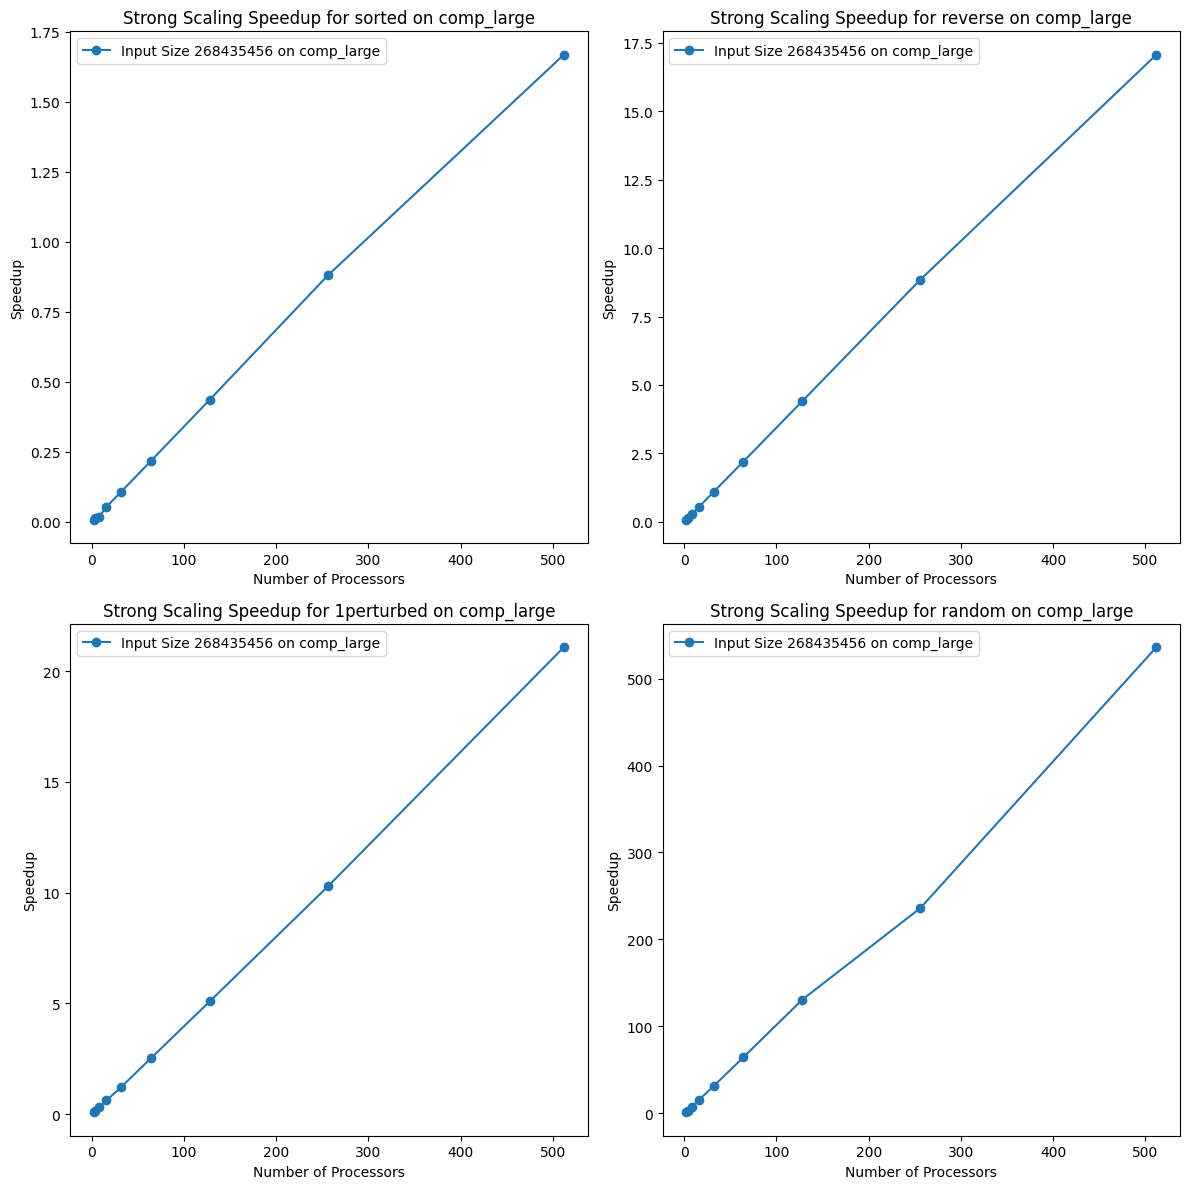

In [11]:
input_sizes = [268435456]  # Largest problem size
input_types = ["sorted", "reverse", "1perturbed", "random"]

# Function to create strong scaling speedup plots with 2x2 subplots
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            # Create a figure with a 2x2 grid of subplots
            fig, axs = plt.subplots(2, 2, figsize=(12, 12))
            
            # Flatten the axs array to easily iterate over it
            axs = axs.flatten()

            for idx, input_type in enumerate(input_types):
                ax = axs[idx]  # Select the appropriate subplot
                
                baseline_time = tk.dataframe[
                    (tk.dataframe["num_procs"] == 2) & (tk.dataframe["input_type"] == input_type)
                ]["Avg time/rank"].values[0]
                
                for input_size in input_sizes:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) & 
                        (tk.dataframe["input_size"] == input_size) & 
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    
                    speedup = baseline_time / data["Avg time/rank"]
                    ax.plot(data["num_procs"], speedup, marker='o', label=f'Input Size {input_size} on {node_name}')
                
                ax.set_title(f'Strong Scaling Speedup for {input_type} on {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()

            # Hide any unused subplots (if there are fewer than 4 input types)
            for j in range(idx + 1, len(axs)):
                fig.delaxes(axs[j])

            # Adjust layout to prevent overlap of subplot titles, labels, etc.
            plt.tight_layout()
            plt.show()

# Call the function
plot_speedup(tk, input_types)

In [ ]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe